# **Construindo um Modelo com Tensorflow -  🐶 🐱!**

**Problema: uma imagem, dizer se é um dog ou um cat.**

Computer Vision; Deep Learning; Machine Learning; Artificial Inteligence! Nada disso faz sentido sem dados, muitos dados (Big Data! 🚀). Para isso, teremos:

* **Treinamento**: 25.000 imagens nomeadas: 12.500 de dogs e 12.500 de cats.
* **Teste**: 1.000 imagens de dogs e cats.

Usa-se os dados de treino para treinar o algoritmo e então criar o modelo preditivo. Usa-se os dados de teste para confirmar o desempenho do modelo preditivo já treinado, ou seja, apresenta-se ao modelo preditivo dados que ele não viu durante o treinamento, a fim de garantir que ele seja capaz de fazer previsões.

Por fim, o modelo de duas camadas de convolução seguidas de pooling, a camada de flattening, e as camadas totalmente conectadas (Dense), com a função de ativação sigmoid para a saída binária.

**Não há mágica. Há matemática!** 🧙

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


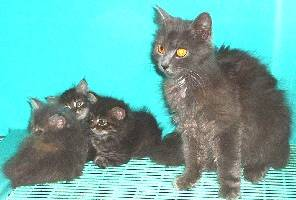

In [13]:
# Do dataset de treino, carregue uma imagem de gato
from IPython.display import Image
Image(filename='/content/drive/MyDrive/Colab Notebooks/dataset/dataset_treino/cats/cat.101.jpg')

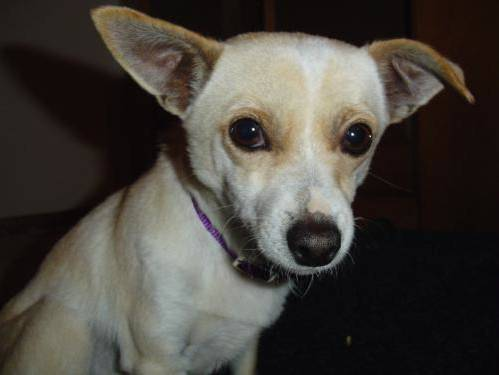

In [14]:
# Do dataset de treino, carregue uma imagem de cachorro
from IPython.display import Image
Image(filename='/content/drive/MyDrive/Colab Notebooks/dataset/dataset_treino/dogs/dog.104.jpg')

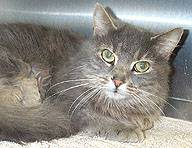

In [15]:
# Do dataset de teste, carregue uma imagem de gato ou de cachorro
from IPython.display import Image
Image(filename='/content/drive/MyDrive/Colab Notebooks/dataset/dataset_teste/7.jpg')

In [58]:
import tensorflow as tf
from sklearn.utils import class_weight
import keras as K
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, Dropout,MaxPooling2D, Flatten, Dense

In [112]:
# Inicializando a Rede Neural Convolucional
classifier = Sequential()

In [113]:
# 32 features; formato 3x3; Imagens 64x64; Array 3D (RGB).

# Adicionando a Primeira Camada de Convolução
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

# Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adicionando a Segunda Camada de Convolução
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))

# Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Flattening - Transformando em 1D
classifier.add(Flatten())

# Full connection
classifier.add(Dense(units = 128, activation = 'relu'))

#Normalização de pesos para evitar overfitting
classifier.add(Dropout(0.5))

classifier.add(Dense(units = 1, activation = 'sigmoid'))

# Compilando a rede
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [95]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Criar o objeto com as regras de pré-processamento
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   validation_split=0.2 )

In [114]:
validation_set = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Colab Notebooks/dataset/dataset_treino',
    target_size=(64, 64),
    batch_size=64,
    class_mode='binary',
    subset='validation'
)

Found 200 images belonging to 2 classes.


In [115]:
# Pré-processamento das imagens de treino
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/dataset/dataset_treino',
                                                 target_size = (64, 64),
                                                 batch_size = 64,
                                                 class_mode = 'binary',
                                                 subset='training')

Found 802 images belonging to 2 classes.


In [116]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)


In [117]:
# Alterando o método de treinamento
classifier.fit(
    training_set,
    validation_data=validation_set,
    steps_per_epoch=len(training_set),
    validation_steps=len(validation_set),
    epochs=25,
    callbacks=[early_stopping]
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 13s 734ms/step - accuracy: 0.4450 - loss: 0.8610 - val_accuracy: 0.5000 - val_loss: 0.6925
Epoch 2/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 460ms/step - accuracy: 0.4966 - loss: 0.6921 - val_accuracy: 0.5000 - val_loss: 0.6902
Epoch 3/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 381ms/step - accuracy: 0.5139 - loss: 0.6881 - val_accuracy: 0.5150 - val_loss: 0.6824
Epoch 4/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 427ms/step - accuracy: 0.5594 - loss: 0.6774 - val_accuracy: 0.6000 - val_loss: 0.6739
Epoch 5/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 389ms/step - accuracy: 0.6097 - loss: 0.6683 - val_accuracy: 0.5600 - val_loss: 0.6884
Epoch 6/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 385ms/step - accuracy: 0.6252 - loss: 0.6450 - val_accuracy: 0.6000 - val_loss: 0.6601
Epoch 7/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 444ms/step - accuracy: 0.6822 - loss: 0.6151 - val_accuracy: 0.6850 - val_loss: 0.6297
Epoch 8/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 402ms/step - accuracy: 0.6730 - loss: 0.6175 - val_accuracy: 

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 256ms/step


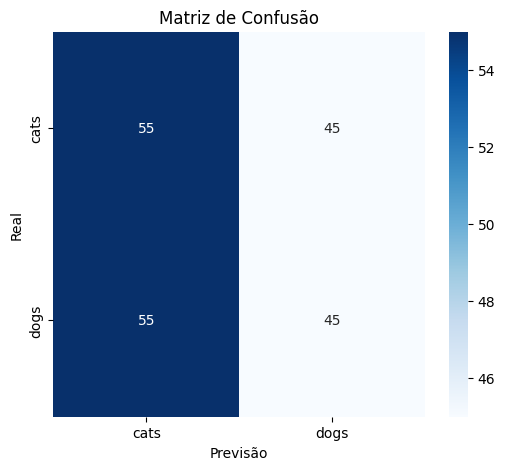


Relatório de Classificação:
              precision    recall  f1-score   support

        cats       0.50      0.55      0.52       100
        dogs       0.50      0.45      0.47       100

    accuracy                           0.50       200
   macro avg       0.50      0.50      0.50       200
weighted avg       0.50      0.50      0.50       200



In [118]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Previsões do modelo para o conjunto de validação
Y_pred = classifier.predict(validation_set, steps=len(validation_set), verbose=1)
y_pred = (Y_pred > 0.5).astype(int).reshape(-1)

# Labels verdadeiros
y_true = validation_set.classes

# Matriz de confusão
cm = confusion_matrix(y_true, y_pred)

# Mapeando os índices para os nomes das classes
class_names = list(validation_set.class_indices.keys())

# Plotando com seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Previsão')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

# Exibir relatório de classificação completo
print("\nRelatório de Classificação:")
print(classification_report(y_true, y_pred, target_names=class_names))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step
[[0.21731675]]
{'cats': 0, 'dogs': 1}
Previsão: Gato.
Acurácia: 78.27 %.


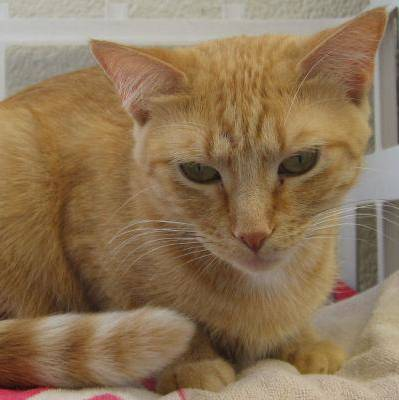

In [119]:
import numpy as np
from keras.preprocessing import image
from IPython.display import Image

# Carregando a imagem de teste
test_image = image.load_img('/content/drive/MyDrive/Colab Notebooks/dataset/dataset_teste/45.jpg', target_size=(64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
test_image = test_image / 255.0  # Normalizar a imagem

# Fazendo a previsão usando o modelo classifier
result = classifier.predict(test_image)
print(result)
class_indices = training_set.class_indices
print(class_indices)

# Interpretando a
if result[0][0] >= 0.5:
    prediction = 'Cachorro.'
    accuracy = round(result[0][0] * 100, 2)  # A saída de previsão é uma probabilidade entre 0 e 1
else:
    prediction = 'Gato.'
    accuracy = round((1 - result[0][0]) * 100, 2)  # A saída de previsão é uma probabilidade entre 0 e 1

# Exibindo a previsão e a acurácia
print("Previsão:", prediction)
print("Acurácia:", accuracy, "%.")

# Exibindo a imagem
Image(filename='/content/drive/MyDrive/Colab Notebooks/dataset/dataset_teste/45.jpg')
